# Zomato Restaurants Data

Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. Data has been collected from the Zomato API in the form of .json files(raw data).The target of the zomato restaurant dataset is Aggregate Rating.We need to predict the aggregate rating based on different features.

[Zomato Restaurant Data](https://www.kaggle.com/shrutimehta/zomato-restaurants-data)

Importing the libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline


## Data Preprocessing

Loading the dataset

In [ ]:
df = pd.read_csv("zomato.csv",encoding='ISO-8859-1')

In [95]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Keys of the zomato restaurant

In [96]:
df.keys()

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

## Feature Engineering

### Multilabel Binarizer
Converting the multivalues in the data to the matrix format

In [98]:
from sklearn.preprocessing import MultiLabelBinarizer

In [99]:
mlb = MultiLabelBinarizer()

In [100]:
 new_cuisine=pd.DataFrame(mlb.fit_transform(df['Cuisines'].astype(str)))

In [101]:
new_cuisine.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1,1,0,0,0,0,1,0,1,0,...,1,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [102]:
 restaurant_name=pd.DataFrame(mlb.fit_transform(df['Restaurant Name'].astype(str)))

In [103]:
new_city=pd.DataFrame(mlb.fit_transform(df['City'].astype(str)))

In [104]:
new_address=pd.DataFrame(mlb.fit_transform(df['Address'].astype(str)))

In [105]:
new_locality=pd.DataFrame(mlb.fit_transform(df['Locality'].astype(str)))

In [106]:
locality_verbose=pd.DataFrame(mlb.fit_transform(df['Locality Verbose'].astype(str)))

In [107]:
df['new cost'] = 0

Coverting all various currencies into dollar

In [108]:
d = {'Botswana Pula(P)':0.095, 'Brazilian Real(R$)':0.266,'Dollar($)':1,'Emirati Diram(AED)':0.272,
    'Indian Rupees(Rs.)':0.014,'Indonesian Rupiah(IDR)':0.00007,'NewZealand($)':0.688,'Pounds(\x8c£)':1.314,
    'Qatari Rial(QR)':0.274,'Rand(R)':0.072,'Sri Lankan Rupee(LKR)':0.0055,'Turkish Lira(TL)':0.188}

df['new cost'] = df['Average Cost for two'] * df['Currency'].map(d)

In [109]:
df['cuisine'] = 0

### Principle Component Analysis
PCA is used to reduce larger dimension columns into specified columns without losing the contents

In [110]:
from sklearn.decomposition import PCA

In [111]:
pca=PCA()

Here I am converting the cuisine,restaurant,city,address,locality,locality_verbose into single column

In [112]:
cuisine = pca.fit_transform(new_cuisine)
pca = PCA(n_components=1)  
cuisine = pca.fit_transform(cuisine)
df['cuisine']=cuisine

In [113]:
df['cuisine'].head()

0    0.705835
1    1.787682
2    0.014785
3    0.610066
4    0.877396
Name: cuisine, dtype: float64

In [114]:
restaurant = pca.fit_transform(restaurant_name)
pca = PCA(n_components=1)  
restaurant = pca.fit_transform(restaurant)
df['restaurant']=restaurant

In [115]:
city = pca.fit_transform(new_city)
pca = PCA(n_components=1)  
city = pca.fit_transform(city)
df['city']=city

In [116]:
address = pca.fit_transform(new_address)
pca = PCA(n_components=1)  
address = pca.fit_transform(address)
df['address']=address

In [117]:
locality = pca.fit_transform(new_locality)
pca = PCA(n_components=1)  
locality = pca.fit_transform(locality)
df['locality']=locality

In [118]:
locality_verbose = pca.fit_transform(locality_verbose)
pca = PCA(n_components=1)  
locality_verbose = pca.fit_transform(locality_verbose)
df['locality_verbose']=locality_verbose

In [119]:
cuisine.shape

(9551, 1)

### Label Encoder
Converting the single categorical values in the dataset into numerical values

In [120]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


Here i am converting Has table booking, Has online delivery, Is delivering now, Rating text, City, Rating Color, Switch to order menu to equivalent integer values

In [121]:
df['Has Table booking'] = labelencoder.fit_transform(df['Has Table booking'])

In [122]:
df['Has Online delivery'] = labelencoder.fit_transform(df['Has Online delivery'])

In [123]:
df['Is delivering now'] = labelencoder.fit_transform(df['Is delivering now'])

In [124]:
df['Rating text']= labelencoder.fit_transform(df['Rating text'])

In [125]:
df['Rating text'].head()

0    1
1    1
2    5
3    1
4    1
Name: Rating text, dtype: int32

In [126]:
df['City'] = labelencoder.fit_transform(df['City'])

In [127]:
df['Rating color'] = labelencoder.fit_transform(df['Rating color'])

In [128]:
df['Switch to order menu'] = labelencoder.fit_transform(df['Switch to order menu'])

Renaming the column names

In [129]:
df.rename(columns = {"Aggregate rating":"Aggregate_rating", 
                    "Price range":"Price_range",
                    "Rating color":"Rating_color",
                      "Restaurant ID":"Restaurant_id",
                      "new cost":"new_cost",
                        "Rating text":"Rating_text"}, 
                                 inplace = True)

Dropping the few attributes which is already exits in the dataset

In [130]:
zomato=df.drop(['Restaurant Name','Cuisines','City','Address','Locality','Locality Verbose',
       'Average Cost for two', 'Currency'],axis=1)

### Updated Dataset
Converting all categorical values into numerical values 

In [131]:
zomato.head()

,Restaurant_id,Country Code,Longitude,Latitude,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,new_cost,cuisine,restaurant,city,address,locality,locality_verbose
0,6317637,162,121.027535,14.565443,1,0,0,0,3,4.8,0,1,314,104.5,0.705835,-0.002407,0.936396,0.615968,0.305680,1.031834
1,6304287,162,121.014101,14.553708,1,0,0,0,3,4.5,0,1,591,114.0,1.787682,-0.898108,0.936396,0.389938,-0.218013,0.527627
2,6300002,162,121.056831,14.581404,1,0,0,0,4,4.4,1,5,270,380.0,0.014785,1.142917,1.503840,0.801711,-0.377310,0.995238
3,6318506,162,121.056475,14.585318,0,0,0,0,4,4.9,0,1,365,142.5,0.610066,-1.614928,1.503840,0.662146,0.068879,1.237404
4,6314302,162,121.057508,14.584450,1,0,0,0,4,4.8,0,1,229,142.5,0.877396,-0.620946,1.503840,0.678746,0.068879,1.237404


In [132]:
zomato.shape

(9551, 20)

#### Counting the each value for the particular feature

In [133]:
zomato['Has Online delivery'].value_counts()

0    7100
1    2451
Name: Has Online delivery, dtype: int64

In [134]:
zomato['Has Table booking'].value_counts()

0    8393
1    1158
Name: Has Table booking, dtype: int64

In [135]:
df['Is delivering now'].value_counts()

0    9517
1      34
Name: Is delivering now, dtype: int64

In [136]:
zomato['Switch to order menu'].value_counts()

0    9551
Name: Switch to order menu, dtype: int64

In [137]:
zomato['Price_range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price_range, dtype: int64

## Data Visualization

Plotting the graph for Votes with respect to Aggregate rating using seaborn

(1, 5)

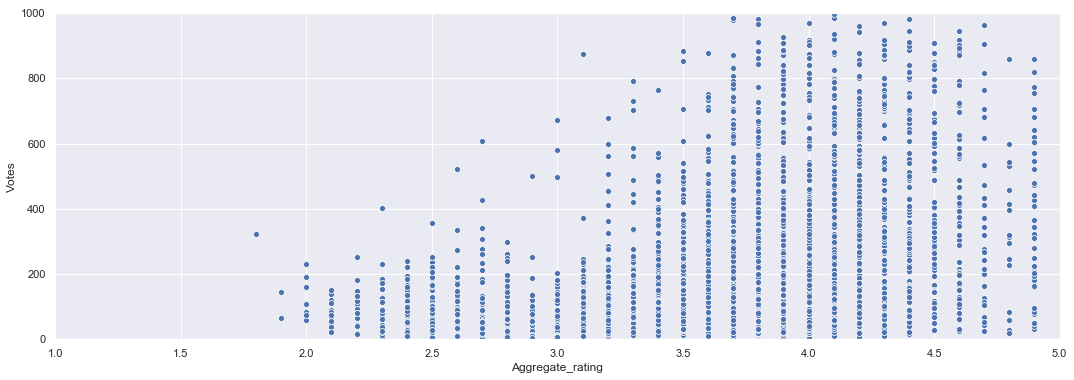

In [138]:
sns.set(rc={'figure.figsize':(18,6)})
sns.scatterplot(data=zomato,x='Aggregate_rating',y='Votes')
plt.ylim(0,1000)
plt.xlim(1,5)

Plotting the graph for has Table booking with respect to Aggregate rating using seaborn

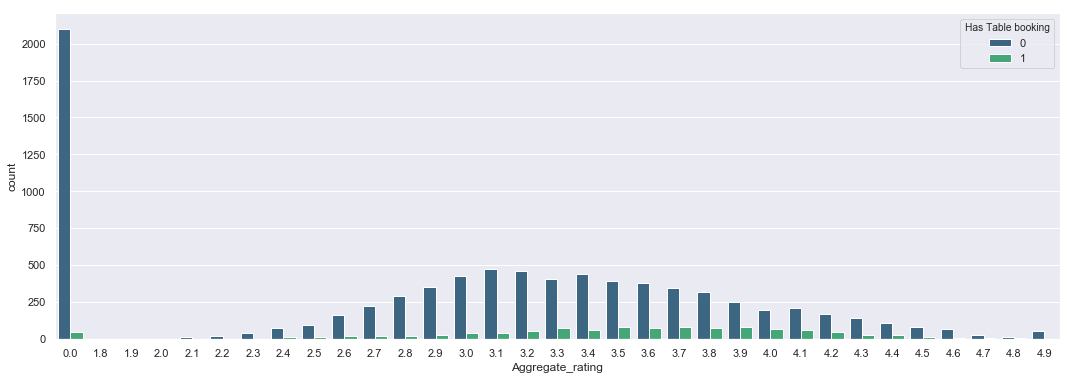

In [139]:
sns.countplot(data=zomato,x='Aggregate_rating',hue='Has Table booking',palette='viridis')

Plotting the graph for has online delivery with respect to Aggregate rating using seaborn

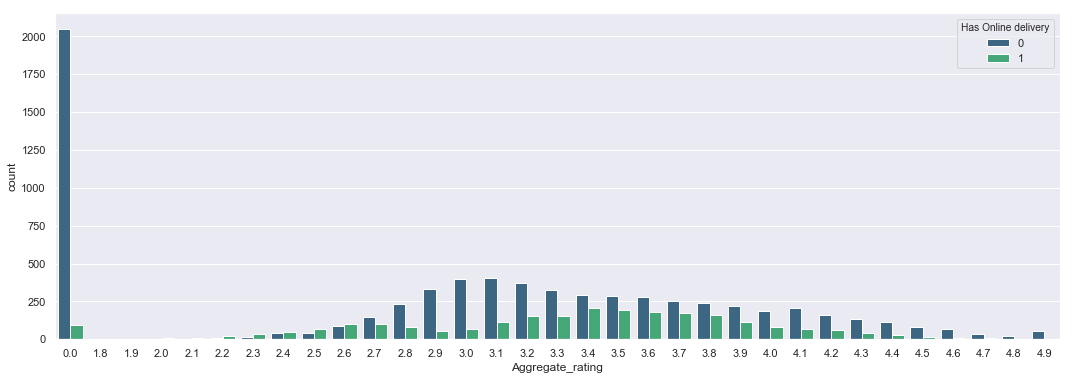

In [140]:
sns.countplot(data=zomato,x='Aggregate_rating',hue='Has Online delivery',palette='viridis')

Plotting the graph for rating text with respect to Aggregate rating using seaborn

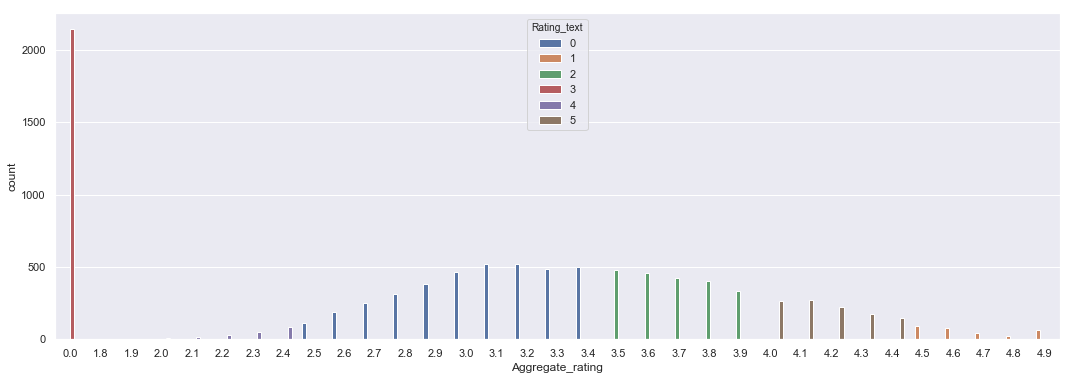

In [141]:
sns.countplot(data=zomato,x='Aggregate_rating',hue='Rating_text')

Plotting the graph for Price range with respect to Aggregate rating using seaborn

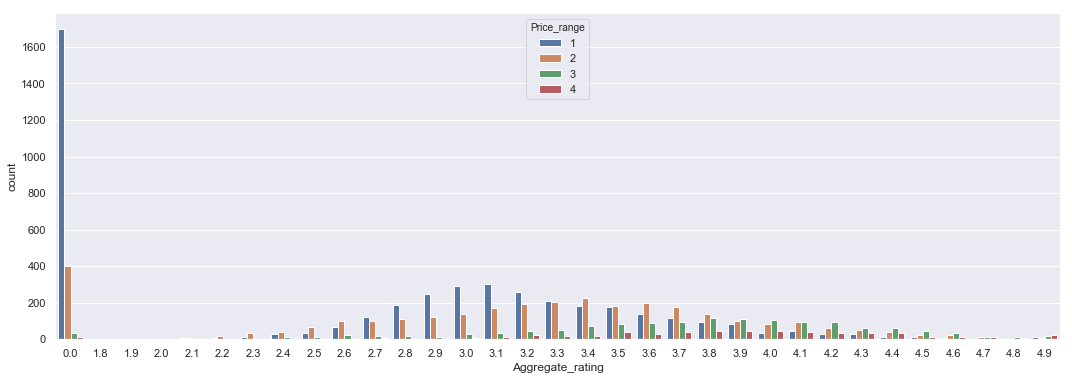

In [142]:
sns.countplot(data=zomato,x='Aggregate_rating',hue='Price_range')

Some feature in the dataset having unbiased values so i am removing them

In [143]:
zomato=zomato.drop(['Has Online delivery','Has Table booking','Is delivering now','Switch to order menu'],axis=1)

## Feature Selection

### Seaborn graph

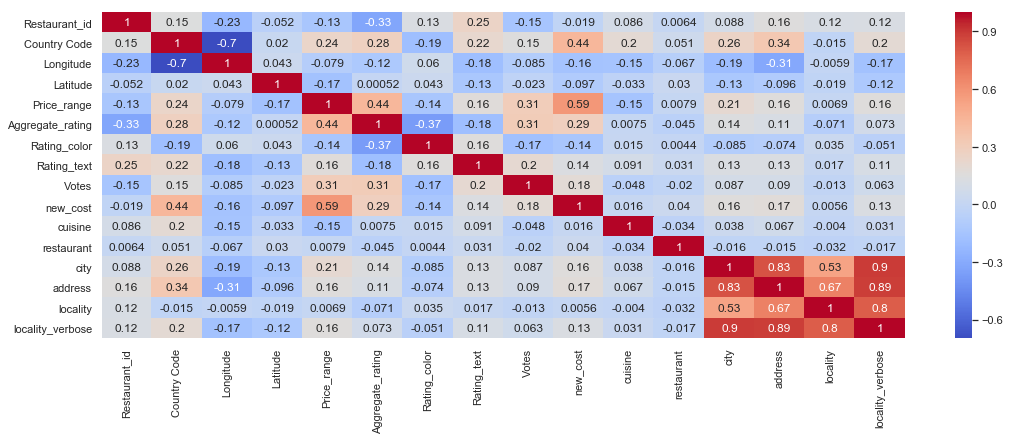

In [144]:
sns.set(rc={'figure.figsize':(18,6)})
sns.heatmap(data=zomato.corr(),cmap='coolwarm',annot=True)


Performing the pearson's correlation for choosing the best feature which is highly related to the target values [Aggregate rating]

In [145]:
corr=zomato.corr('pearson')
abs(corr['Aggregate_rating']).sort_values(ascending=False)

Aggregate_rating    1.000000
Price_range         0.437944
Rating_color        0.367054
Restaurant_id       0.326212
Votes               0.313691
new_cost            0.289929
Country Code        0.282189
Rating_text         0.182662
city                0.144101
Longitude           0.116818
address             0.113845
locality_verbose    0.073368
locality            0.070686
restaurant          0.045381
cuisine             0.007479
Latitude            0.000516
Name: Aggregate_rating, dtype: float64

In [146]:
x1=np.array(df["Price_range"])
x2=np.array(df["Rating_color"])
x3=np.array(df["Restaurant_id"])
x4=np.array(df["Votes"])
x5=np.array(df["new_cost"])
y=np.array(df["Aggregate_rating"])

### Feature Scaling


When we plot the graph for each feature with respect to target, the values are in different margin. To come under the same scale we need to normalize it. Here normalization can be done by calculating the difference of minimum and maximum value

In [147]:
x1=(x1-x1.min())/(x1.max()-x1.min())
x2=(x2-x2.min())/(x2.max()-x2.min())
x3=(x3-x3.min())/(x3.max()-x3.min())
x4=(x4-x4.min())/(x4.max()-x4.min())
x5=(x5-x5.min())/(x5.max()-x5.min())
y=(y-y.min())/(y.max()-y.min())

### Splitting the dataset
We are splitting the dataset for training and testing the datapoints in the ratio 3:2.So that we can train our model and test the datapoints on the same model.

In [148]:
X1_train,X1_test,X2_train,X2_test,X3_train,X3_test,X4_train,X4_test,X5_train,X5_test,Y_train,Y_test=train_test_split(x1,x2,x3,x4,x5,y,test_size=0.3)

## Linear Regression
### Hypothesis Equation
As above mentioned we need to predict the aggregate rating so that by analysing the data visualization we can choose straight line equation is the best to fit the model covering all the points with less error.



In [149]:
def hypothesis(a,b,c,d,f,g,x1,x2,x3,x4,x5):
    return a*x1+b*x2+c*x3+d*x4+f*x5+g

### Error Equation
When we plot the hypothesis equation to represent the model, all data points are not covered.There is some error with actual datapoint and the hypothesis equation representation.So we need to calculate the error for all the datapoints in the model with respect to the hypothesis equation values.

Error is find out by taking difference between the hypothesis equation and actual data point(y).We are finding the mean(m) of all the errors for the particular hypothesis equation.

Suppose if there is any negative error value the sum may be zero so that, we are finding the square of the difference between the hypothesis equation datapoint and actual data point.It leads to all positive error values.Since we are squaring the difference we need to reduce by 2.

This function we called it as mean square error equation.

In [150]:
def error(a,b,c,d,f,g,x1,x2,x3,x4,x5,y):
    e = 0
    m = len(x1)
    for i in range(m):
        e += np.power((hypothesis(a,b,c,d,f,g,x1[i],x2[i],x3[i],x4[i],x5[i])-y[i]), 2)
    
    return (1/(2*m))*e 


### Step Gradient Equation
When we plot the error equation with respect to the weights we will get the curve something like parabola. Our aim to minimize the error such that it should reach the global minima of the parabola curve.We dont know where is our data point in the parabola curve so that to reach the global minima we need to differenciate the error equation with respect to the weight to get the slope of that particular data point.

Gradient descent equation represented by grad_a,grad_b,grad_c,grad_d,grad_f,grad_g

If the slope of the data point is negative then we need to move towards right to reach the global minima so that we should add small value to weights. Simillarly if the slope of the data point is positive then we need to move towards left to reach the global minima so that we should subtract small value to weights.

Learning rate defines the step size to read the global minima.Suppose if the step size is large then it may cross the global minima leads to the overfit the model.To avoid these kind of issues we are defining the learning rate.It tells the how much steps should be moved.

In [151]:
def step_gradient(a,b,c,d,f,g,x1,x2,x3,x4,x5,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    grad_d = 0
    grad_f = 0
    grad_g = 0
    m = len(x1)
    for i in range(m):
        grad_a += 2/m * (hypothesis(a,b,c,d,f,g,x1[i],x2[i],x3[i],x4[i],x5[i]) - y[i]) * x1[i]
        grad_b += 2/m * (hypothesis(a,b,c,d,f,g,x1[i],x2[i],x3[i],x4[i],x5[i]) - y[i]) * x2[i]
        grad_c += 2/m * (hypothesis(a,b,c,d,f,g,x1[i],x2[i],x3[i],x4[i],x5[i]) - y[i]) * x3[i]
        grad_d += 2/m * (hypothesis(a,b,c,d,f,g,x1[i],x2[i],x3[i],x4[i],x5[i]) - y[i]) * x4[i]
        grad_f += 2/m * (hypothesis(a,b,c,d,f,g,x1[i],x2[i],x3[i],x4[i],x5[i]) - y[i]) * x5[i]
        grad_g += 2/m * (hypothesis(a,b,c,d,f,g,x1[i],x2[i],x3[i],x4[i],x5[i]) - y[i])
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)
    d = d - (grad_d * learning_rate)
    f = f - (grad_f * learning_rate)
    g = g - (grad_g * learning_rate)
    
    return a, b, c, d, f, g


### Descend Function
Intialising the values of a,b,c,d,f,g. Iterations tells about how many times we are training the model.In this function we are printing the values of error at every 1000 iteration.

In [152]:
def descend(initial_a, initial_b, initial_c, intial_d, intial_f, intial_g, x1, x2, x3, x4, x5, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    c = initial_c
    d = intial_d
    f = intial_f
    g = intial_g
    for i in range(iterations):
        e = error(a, b, c, d, f, g, x1, x2, x3, x4, x5, y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}, c: {c}, d:{d}, f:{f}, g:{g}")
        
        a, b, c, d, f, g = step_gradient(a, b, c, d, f, g, x1, x2, x3, x4, x5, y, learning_rate)

    return a, b, c, d, f, g


We need to change the weights to generalized the model so that the we can predict the electric energy for the given features with less error

In [153]:
a = 0.3143923011542631
b = -0.2727912752251983
c = -0.1543555237048141
d = 0.9607879649507985
f = 0.3515218184601838
g = 0.6772458007705034
learning_rate = 0.05
iterations = 10000

In [60]:
final_a,final_b,final_c,final_d,final_f,final_g=descend(a,b,c,d,f,g,X1_train,X2_train,X3_train,X4_train,X5_train,Y_train,learning_rate,iterations)

Error: 0.030517542629416364, a: 0.3143923011542631, b: -0.2727912752251983, c: -0.1543555237048141, d:0.9607879649507985, f:0.3515218184601838, g:0.6772458007705034
Error: 0.030508022547920344, a: 0.3098912023878662, b: -0.2841321948711142, c: -0.1526651281187017, d:0.9689682567692838, f:0.3579910906236895, g:0.6818583728859365
Error: 0.0305071476407316, a: 0.309201719747692, b: -0.2840044999580213, c: -0.15264421441349926, d:0.9759755417044009, f:0.36413797932288433, g:0.6817327646941466
Error: 0.030506442141452365, a: 0.3086010863171014, b: -0.28385738465538335, c: -0.15262448956895217, d:0.9820645070911184, f:0.3698826924207804, g:0.6815923079892969
Error: 0.030505870212913455, a: 0.30805525212416224, b: -0.28372627012240254, c: -0.15260921642642494, d:0.9873555929055552, f:0.3752503817071484, g:0.681468041946112
Error: 0.030505404133615282, a: 0.30755849874796726, b: -0.2836094229501459, c: -0.1525977055699955, d:0.9919533099047048, f:0.38026576120768624, g:0.6813581222296748
Error

Error for trained data

In [61]:
error(final_a,final_b,final_c,final_d,final_f,final_g,X1_train,X2_train,X3_train,X4_train,X5_train,Y_train)

0.030504050949409042

Error for test data

In [62]:
error(final_a,final_b,final_c,final_d,final_f,final_g,X1_test,X2_test,X3_test,X4_test,X5_test,Y_test)

0.031013154574233752

Root mean squared error for trained data

In [63]:
np.sqrt(error(final_a,final_b,final_c,final_d,final_f,final_g,X1_train,X2_train,X3_train,X4_train,X5_train,Y_train))

0.17465408941507507

Root mean squared error for test data

In [64]:
np.sqrt(error(final_a,final_b,final_c,final_d,final_f,final_g,X1_test,X2_test,X3_test,X4_test,X5_test,Y_test))

0.17610552113501085


## Linear Regression using Sklearn

In [158]:
new_zomato= zomato[['Restaurant_id','Price_range','Rating_text','Votes','new_cost','Aggregate_rating']]

Get dummies is used to add the features of seperate column values in the dataset

In [161]:
new_zomato = pd.get_dummies(new_zomato, columns=['Price_range','Rating_text'])


In [162]:
new_zomato.head()

,Restaurant_id,Votes,new_cost,Aggregate_rating,Price_range_1,Price_range_2,Price_range_3,Price_range_4,Rating_text_0,Rating_text_1,Rating_text_2,Rating_text_3,Rating_text_4,Rating_text_5
0,6317637,314,104.5,4.8,0,0,1,0,0,1,0,0,0,0
1,6304287,591,114.0,4.5,0,0,1,0,0,1,0,0,0,0
2,6300002,270,380.0,4.4,0,0,0,1,0,0,0,0,0,1
3,6318506,365,142.5,4.9,0,0,0,1,0,1,0,0,0,0
4,6314302,229,142.5,4.8,0,0,0,1,0,1,0,0,0,0


In [163]:
new_zomato.shape

(9551, 14)

In [164]:
# feature=pd.concat([df['Price range'],df['Votes'],df['new cost']],axis=1)

In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Separing the features and the target with seperate dataframes

In [166]:
X = new_zomato.drop(['Aggregate_rating'], axis=1)
Y = new_zomato['Aggregate_rating']

### Splitting the dataset
We are splitting the dataset for training and testing the datapoints in the ratio 3:2.So that we can train our model and test the datapoints on the same model.

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

Importing Linear Regression Sklearn model

In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
regressor = LinearRegression()

Fitting the Linear model for trained dataset

In [171]:
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Predicting the Linear Model for test datapoints

In [172]:
Y_pred=regressor.predict(X_test)

In [173]:
for i in zip(Y_pred,Y_test):
    print(i)

(3.0303032340416873, 2.7)
(3.0316361443003808, 3.2)
(3.062875473229739, 2.5)
(-0.027906858627961384, 0.0)
(3.0703500134386634, 3.3)
(0.0035137553489437146, 0.0)
(3.03129390282017, 3.0)
(3.04057144562149, 3.1)
(3.6532383716195627, 3.7)
(3.714381090630367, 3.6)
(3.030899081708353, 3.4)
(3.0315660451680055, 3.1)
(3.0318379816664573, 2.7)
(0.0031874074883457837, 0.0)
(4.207113665645426, 4.3)
(3.0704985137288054, 3.0)
(3.720516456015221, 3.5)
(3.649349774452478, 3.9)
(3.724708089040541, 3.9)
(3.0626439374583057, 3.3)
(3.03164023340723, 3.1)
(3.659577426309664, 3.6)
(3.653669846072736, 3.5)
(3.0697106863792976, 3.2)
(2.2747689266766886, 2.3)
(0.0026242363093058607, 0.0)
(0.0034668538745847854, 0.0)
(4.142320258034992, 4.0)
(3.6492034625341923, 3.6)
(4.175445441278277, 4.0)
(3.072033114752683, 3.2)
(0.002813283706660119, 0.0)
(3.0438317968484325, 3.4)
(0.0034997756055359375, 0.0)
(3.727840533105975, 3.7)
(3.0404214395031723, 2.8)
(3.6523711580719267, 3.9)
(3.063269778815606, 2.8)
(3.645296031

(0.0030930201642127564, 0.0)
(3.046667600669982, 3.3)
(0.0031044613021973255, 0.0)
(4.142802213134927, 4.3)
(3.0379709490053077, 2.7)
(4.174523114696114, 4.0)
(3.6826198822622254, 3.6)
(3.062574239519506, 3.1)
(3.690188319535617, 3.8)
(0.003024401740249427, 0.0)
(3.0465876023967167, 3.4)
(0.0030367374989985763, 0.0)
(3.6970954633251147, 3.5)
(0.002610151856999199, 0.0)
(0.009269014621978489, 0.0)
(3.0387707211395014, 3.2)
(3.0330715379560917, 3.0)
(4.180054080195821, 4.2)
(4.153702402648758, 4.0)
(3.6785248591222084, 3.7)
(3.652049676167019, 3.6)
(2.3172161165308136, 2.3)
(3.0305575259835797, 3.0)
(3.0618530255877463, 3.2)
(4.1904852249788265, 4.1)
(3.1307879220011485, 2.7)
(-0.028712776704600707, 0.0)
(3.0397583707710396, 2.7)
(0.002801449017898694, 0.0)
(-0.028338167352877974, 0.0)
(3.0316499484419364, 2.8)
(3.728585410783171, 3.9)
(3.6592098718866244, 3.6)
(3.034660721578637, 3.4)
(3.063487679243775, 3.2)
(3.030755217739132, 3.1)
(3.0380325031740782, 3.4)
(3.063463896637689, 3.3)
(3

In [174]:
from sklearn.metrics import mean_squared_error, r2_score

#### Mean Squared error

In [175]:
mean_squared_error(Y_test,Y_pred)

0.03181882861934459

#### Root mean Squared error

In [176]:
np.sqrt(mean_squared_error(Y_test,Y_pred))

0.17837833001613337

Computing the r2_score for Linear Regression

In [177]:
r2_score(Y_test,Y_pred)

0.9858680972436761